In [1]:
#module imports
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from ambit_stochastics.trawl import trawl
from scipy.stats import norm,gamma,nbinom
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np
import math
plt.style.use('ggplot')

#from pandas.plotting import lag_plot
#from scipy import stats
#import statsmodels.api as sm
#import time 
np.random.seed(seed=31051965)
from scipy.stats import invgauss

In [18]:
tau = 0.25
nr_trawls = 1000  #this is k
nr_simulations = 2
trawl_function_slice = lambda x :  np.exp(x) * (x<=0)
decorrelation_time_slice = -np.inf
gaussian_part_params = (0,0)
jump_part_params = (2,3)
jump_part_name   = 'invgauss' #can be None,'cauchy','invgauss','poisson' (more to be implemented)
total_area = quad(trawl_function_slice,decorrelation_time_slice,0)[0]

In [19]:
trawl_slice = trawl(nr_trawls = nr_trawls, nr_simulations = nr_simulations,trawl_function = trawl_function_slice,tau =  tau,
                   decorrelation_time =  decorrelation_time_slice, gaussian_part_params = gaussian_part_params,
                   jump_part_name =  jump_part_name,jump_part_params = jump_part_params)   
trawl_slice.simulate(method='slice')

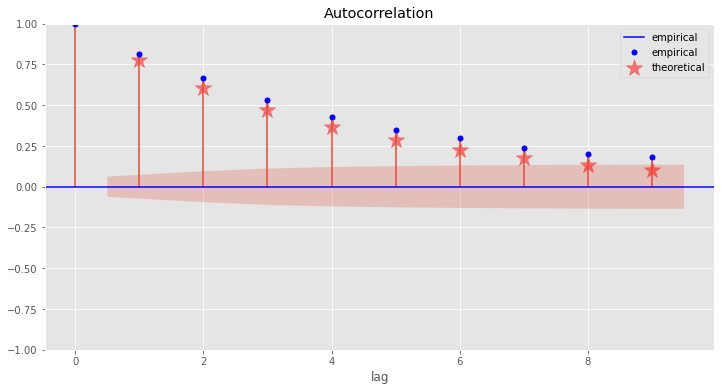

In [20]:
fig_acf, ax_acf = plt.subplots(1,1,figsize=(12,6))
plot_acf(trawl_slice.values[1], lags = 9, ax=ax_acf, color = 'blue', label='empirical')
ax_acf.set_xlabel('lag')
x = np.arange(1,10,1)
y = trawl_slice.theoretical_acf(np.arange(1,10,1)*trawl_slice.tau)


_ = ax_acf.scatter(x,y.values(),marker = "*", color = 'r',s = 300,alpha = 0.5,label='theoretical')
_ = ax_acf.legend()

In [21]:
r_gmm = [invgauss.fit(data = trawl_slice.values[i], floc = 0) for i in range(nr_simulations)]
np.mean(r_gmm,axis=0)[[0,2]], np.median(r_gmm,axis=0)[[0,2]]

(array([1.97781505, 3.11790096]), array([1.97781505, 3.11790096]))

In [77]:
#scaling checks
mu =1.25
scale = 3
leb_A = 5.75
new_mu = mu / leb_A
new_scale = scale * leb_A**2

r1 = np.array([invgauss(mu = mu,scale = scale ,loc=0).mean(),invgauss(mu = mu,scale = scale).var()])
r2 = np.array([invgauss(mu = new_mu,scale = new_scale ,loc=0).mean(),invgauss(mu = new_mu,scale = new_scale).var()])

In [78]:
r2/r1

array([5.75, 5.75])